In [2]:
#### NOTEBOOK CONFIG ####

%load_ext autoreload
%autoreload 2
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
sys.path.append("/home/carlos/Carlos/cerebra-atlas-python")

####### IMPORTS #######

import mne
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import numpy as np
from matplotlib.patches import Rectangle


from cerebra_atlas_python.cerebra import CerebrA
from cerebra_atlas_python.plotting import get_cmap_colors
from cerebra_atlas_python.utils import setup_logging, time_func_decorator
from cerebra_atlas_python.mni_average import MNIAverage

In [3]:
33*40*35

46200

In [4]:
len(cerebra.mni_average.vol_src[0]["neighbor_vert"])

NameError: name 'cerebra' is not defined

array([[-0.00073984, -0.00331891,  0.08369319],
       [ 0.0786732 , -0.00328157,  0.03011615],
       [ 0.02689834,  0.08033116,  0.03537355],
       ...,
       [ 0.00684913,  0.00906104, -0.09696281],
       [ 0.00054144,  0.01090568, -0.09556898],
       [ 0.00199144,  0.00485238, -0.09737741]])

In [ ]:
cerebra.mni_average.bem["surfs"][2]["coord_frame"]

5

In [ ]:
cerebra.mni_average.bem_names

{1: 'outer_skin', 2: 'outer_skull', 3: 'inner_skull'}

In [ ]:
np.min(cerebra.mni_average.bem["surfs"][0]["rr"], axis=0),np.min(cerebra.mni_average.bem["surfs"][1]["rr"], axis=0),np.min(cerebra.mni_average.bem["surfs"][2]["rr"], axis=0)

(array([-0.08827482, -0.10344423, -0.09793349]),
 array([-0.08451179, -0.10006613, -0.09474581]),
 array([-0.07732636, -0.09470944, -0.09248358]))

In [ ]:
np.max(cerebra.mni_average.bem["surfs"][0]["rr"], axis=0),np.max(cerebra.mni_average.bem["surfs"][1]["rr"], axis=0),np.max(cerebra.mni_average.bem["surfs"][2]["rr"], axis=0)

(array([0.08709044, 0.1060625 , 0.08435359]),
 array([0.08314306, 0.10265391, 0.08108299]),
 array([0.07628661, 0.09655676, 0.07455748]))

In [ ]:
cerebra.mni_average.vol_src[0]["coord_frame"]

5

In [ ]:
np.min(cerebra.mni_average.vol_src[0]["rr"], axis=0)

array([-0.08 , -0.095, -0.095])

In [ ]:
np.min(cerebra.mni_average.vol_src[0]["rr"], axis=0)

array([-0.08 , -0.095, -0.095])

In [ ]:
cerebra.mni_average.vol_src[0]

{'id': -1,
 'type': 'vol',
 'shape': (33, 40, 35),
 'src_mri_t': <Transform | MRI voxel->MRI (surface RAS)>
 [[ 0.005  0.     0.    -0.08 ]
  [ 0.     0.005  0.    -0.095]
  [ 0.     0.     0.005 -0.095]
  [ 0.     0.     0.     1.   ]],
 'mri_ras_t': <Transform | MRI (surface RAS)->RAS (non-zero origin)>
 [[ 1.      0.      0.      0.0005]
  [ 0.      1.      0.     -0.0175]
  [ 0.      0.      1.      0.0185]
  [ 0.      0.      0.      1.    ]],
 'vox_mri_t': <Transform | MRI voxel->MRI (surface RAS)>
 [[-0.001       0.          0.          0.12800001]
  [ 0.          0.          0.001      -0.12800001]
  [ 0.         -0.001       0.          0.12800001]
  [ 0.          0.          0.          1.        ]],
 'mri_width': 256,
 'mri_height': 256,
 'mri_depth': 256,
 'mri_volume_name': '/home/carlos/Datasets/subjects/MNIAverage/mri/T1.mgz',
 'neighbor_vert': [array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=

In [ ]:
cerebra.mni_average.vol_src[0]

{'id': -1,
 'type': 'vol',
 'shape': (33, 40, 35),
 'src_mri_t': <Transform | MRI voxel->MRI (surface RAS)>
 [[ 0.005  0.     0.    -0.08 ]
  [ 0.     0.005  0.    -0.095]
  [ 0.     0.     0.005 -0.095]
  [ 0.     0.     0.     1.   ]],
 'mri_ras_t': <Transform | MRI (surface RAS)->RAS (non-zero origin)>
 [[ 1.      0.      0.      0.0005]
  [ 0.      1.      0.     -0.0175]
  [ 0.      0.      1.      0.0185]
  [ 0.      0.      0.      1.    ]],
 'vox_mri_t': <Transform | MRI voxel->MRI (surface RAS)>
 [[-0.001       0.          0.          0.12800001]
  [ 0.          0.          0.001      -0.12800001]
  [ 0.         -0.001       0.          0.12800001]
  [ 0.          0.          0.          1.        ]],
 'mri_width': 256,
 'mri_height': 256,
 'mri_depth': 256,
 'mri_volume_name': '/home/carlos/Datasets/subjects/MNIAverage/mri/T1.mgz',
 'neighbor_vert': [array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=

In [ ]:
from mne.source_space._source_space import _make_volume_source_space
from mne import SourceSpaces

In [ ]:
surf = cerebra.mni_average.bem["surfs"][2]
pos = 5
exclude = 0.0
mindist = 5.0

In [ ]:
sp = _make_volume_source_space(
            surf,
            pos,
            exclude,
            mindist,
            # mri,
            # volume_label,
            # n_jobs=n_jobs,
            # vol_info=vol_info,
         
            # single_volume=single_volume,
        )

In [ ]:
len(sp), sp[0].keys(), sp[0]["inuse"].shape, sp[0]["inuse"].sum()

(1,
 dict_keys(['np', 'nn', 'rr', 'inuse', 'type', 'nuse', 'coord_frame', 'id', 'shape', 'vertno', 'seg_name', 'neighbor_vert', 'src_mri_t', 'vol_dims']),
 (27,),
 1)

In [ ]:
SourceSpaces(sp)

<SourceSpaces: [<volume (the whole brain), n_used=1>] MRI (surface RAS) coords, ~10 kB>

In [ ]:
_make_volume_source_space

<function mne.source_space._source_space._make_volume_source_space(surf, grid, exclude, mindist, mri=None, volume_labels=None, do_neighbors=True, n_jobs=None, vol_info={}, single_volume=False)>

In [ ]:

np.unique(cerebra.mni_average.vol_src[0]['nn'],axis=0)

array([[0., 0., 1.]], dtype='>f4')

In [ ]:
import pandas as pd

cortical = cerebra.label_details[cerebra.label_details["cortical"] == True]
non_cortical = cerebra.label_details[cerebra.label_details["cortical"] == False]
whitematter = cerebra.label_details[cerebra.label_details["Label Name"] == "White matter"]
empty = cerebra.label_details[cerebra.label_details["Label Name"] == "Empty"]

all_regions = pd.concat([cortical, non_cortical, whitematter])

all_regions.drop(empty["CerebrA ID"], inplace=True)
all_regions.drop(whitematter["CerebrA ID"], inplace=True)
all_regions.drop(all_regions[all_regions["hemisphere"] == "Left"]["CerebrA ID"])

ids = all_regions["CerebrA ID"].values
ids

array([  1,   3,   6,   7,   8,   9,  10,  12,  13,  14,  15,  16,  18,
        22,  23,  24,  28,  30,  31,  32,  33,  34,  35,  36,  38,  42,
        43,  44,  45,  47,  51,  52,  54,  57,  58,  59,  60,  61,  63,
        64,  65,  66,  67,  69,  73,  74,  75,  79,  81,  82,  83,  84,
        85,  86,  87,  89,  93,  94,  95,  96,  98, 102,   2,   4,   5,
        11,  17,  19,  20,  21,  25,  26,  27,  29,  37,  39,  40,  41,
        46,  48,  49,  50,  53,  55,  56,  62,  68,  70,  71,  72,  76,
        77,  78,  80,  88,  90,  91,  92,  97,  99, 100, 101])

In [ ]:
size = 3
grid = np.zeros((256,256,256))
a = np.arange(size-1,256,size)
for x in a:
    for y in a:
        grid[x,y,a] = 1
grid_mask = grid.astype(bool)
not_zero_mask = cerebra.cerebra_volume != 0
combined_mask = np.logical_and(grid_mask, not_zero_mask)

In [ ]:
combined_mask.shape

(256, 256, 256)

In [ ]:
np.indices([256,256,256]).shape

(3, 256, 256, 256)

In [ ]:
labels =cerebra.cerebra_volume[combined_mask]
positions =np.indices([256,256,256])[:,combined_mask]
normals = np.repeat([[0,0,1]], len(labels),axis=0)

pos = dict(rr=positions.T, nn=normals)

In [ ]:
src_space = mne.setup_volume_source_space(pos=pos)
src_space[0]

{'coord_frame': 5 (FIFFV_COORD_MRI),
 'type': 'discrete',
 'nuse': 62705,
 'np': 62705,
 'inuse': array([1, 1, 1, ..., 1, 1, 1]),
 'vertno': array([    0,     1,     2, ..., 62702, 62703, 62704]),
 'rr': array([[ 56., 101., 107.],
        [ 56., 101., 110.],
        [ 56., 101., 113.],
        ...,
        [197., 125.,  98.],
        [197., 128.,  95.],
        [197., 128.,  98.]]),
 'nn': array([[0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.],
        ...,
        [0., 0., 1.],
        [0., 0., 1.],
        [0., 0., 1.]]),
 'id': -1 (FIFFV_MNE_SURF_UNKNOWN),
 'nearest': None,
 'dist': None,
 'use_tris': None,
 'patch_inds': None,
 'dist_limit': None,
 'pinfo': None,
 'ntri': 0,
 'nearest_dist': None,
 'nuse_tri': 0,
 'tris': None,
 'subject_his_id': None}

In [ ]:
labels, positions

(array([79, 79, 79, ..., 28, 28, 28], dtype=uint8),
 array([[ 56,  56,  56, ..., 197, 197, 197],
        [101, 101, 101, ..., 125, 128, 128],
        [107, 110, 113, ...,  98,  95,  98]]))

In [ ]:
cerebra_grid = cerebra.cerebra_volume[grid]

In [ ]:
cerebra_grid

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
cerebra.cerebra_volume[grid].shape

(614125,)

In [ ]:
src_space_regions = cerebra.cerebra_volume[grid][cerebra.cerebra_volume[grid] != 0]

In [ ]:
src_space_pts

array([79, 79, 79, ..., 28, 28, 28], dtype=uint8)

In [ ]:
pts = [cerebra.volume_data_sparse[i] for i in ids] 
np.concatenate(pts).shape

(850933, 3)

In [ ]:
ids = cerebra.get_vol_src_pc(include_non_cortical=False)
ids

[  1   3   6   7   8   9  10  12  13  14  15  16  18  22  23  24  28  30
  31  32  33  34  35  36  38  42  43  44  45  47  51  52  54  57  58  59
  60  61  63  64  65  66  67  69  73  74  75  79  81  82  83  84  85  86
  87  89  93  94  95  96  98 102]


array([  1,   3,   6,   7,   8,   9,  10,  12,  13,  14,  15,  16,  18,
        22,  23,  24,  28,  30,  31,  32,  33,  34,  35,  36,  38,  42,
        43,  44,  45,  47,  51,  52,  54,  57,  58,  59,  60,  61,  63,
        64,  65,  66,  67,  69,  73,  74,  75,  79,  81,  82,  83,  84,
        85,  86,  87,  89,  93,  94,  95,  96,  98, 102])

In [ ]:
cerebra.label_details

,Mindboggle ID,Label Name,CerebrA ID,hemisphere,cortical,color
0,0.0,Empty,0,,False,#000000
1,2027.0,Rostral Middle Frontal,1,Right,True,#ff001e
2,631.0,Vermal lobules VI-VII,2,Right,False,#ff0013
3,2009.0,Inferior temporal,3,Right,True,#ff0003
4,58.0,Accumbens Area,4,Right,False,#ff0700
...,...,...,...,...,...,...
99,53.0,Hippocampus,99,Left,False,#ff00f0
100,50.0,Caudate,100,Left,False,#ff00e5
101,630.0,Vermal lobules I-V,101,Left,False,#ff00d4
102,1031.0,Supramarginal,102,Left,True,#ff00ca


In [ ]:
cerebra.src_space_points

array([[ 56, 101, 107],
       [ 56, 101, 110],
       [ 56, 101, 113],
       ...,
       [197, 125,  98],
       [197, 128,  95],
       [197, 128,  98]])

 [INFO] 2023-12-07 15:26:50.645 mni_average - __init__: Using data from SUBJECTS_DIR/MNIAverage
 [INFO] 2023-12-07 15:26:50.645 mni_average - _set_bem: Loading boundary element model from disk | MNIAverage_bem_0.33_0.0042_0.33_ico_4
 [INFO] 2023-12-07 15:26:50.720 mni_average - _set_vol_src: Reading volume source space from disk


(43498, 3)
(43498, 3)
(43498, 3)
<SourceSpaces: [<discrete, n_used=43498>] MRI (surface RAS) coords, ~2.7 MB>


(<Figure size 1500x1500 with 4 Axes>,
 array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
        [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object))

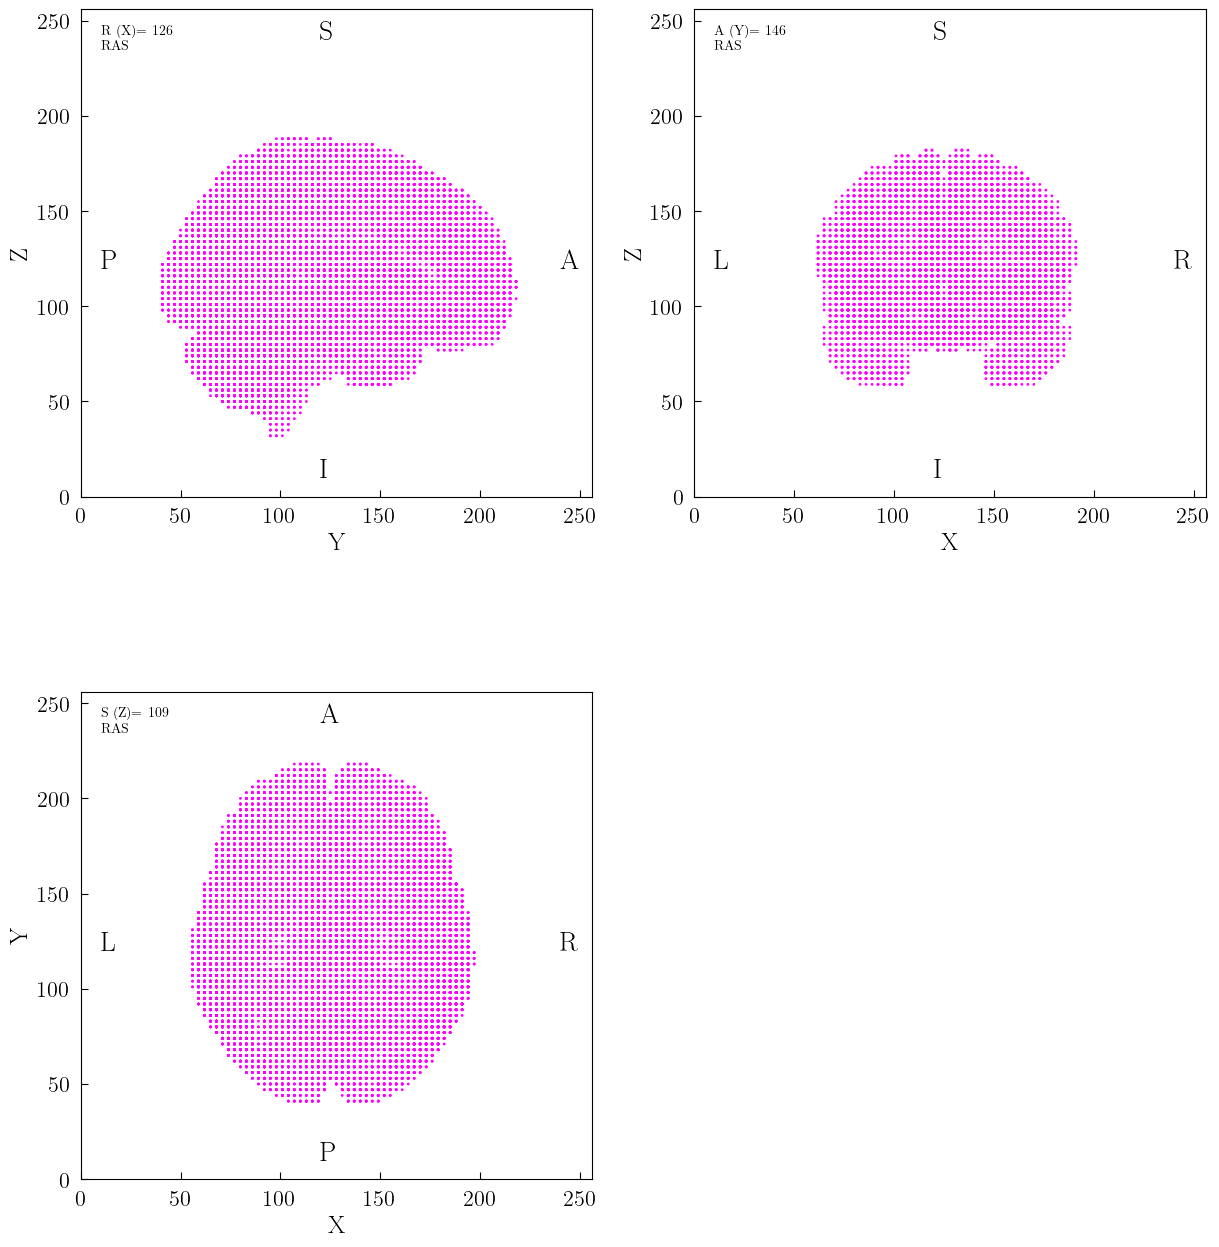

In [ ]:
setup_logging(level="INFO")
cerebra = CerebrA()

print(cerebra.src_space)
cerebra.orthoview(plot_affine=False,plot_bem_surfaces=False, plot_whitematter=True,plot_regions=False, plot_src_space=True)

In [ ]:
axs = cerebra.orthoview(plot_affine=False, plot_whitematter=True,plot_regions=True, plot_src_space=True,plot_bem_surfaces=False, plot_distance_to_inner_skull=False, pt=np.array([145,100,120]))


NameError: name 'cerebra' is not defined